# MI2 - ES09: K-means clustering
## The chantastic 4: Elisabeth Kress, Paola Suárez, Jianmeng Wu and Esra Zihni

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [2]:
def k_means_batch(data, Ks, tmax):
    k_Ws = []
    k_clusters = []
    k_Es = []

    for k in Ks:
        Ws = np.zeros((tmax+1, k, 2))
        Ws[0] = np.random.normal(means, size=(k,2))
        clusters = np.zeros((tmax, data.shape[1]))
        Es = np.zeros(tmax)

        for t in range(tmax):
            dist = euclidean_distances(data.T, Ws[t])
            clusters[t] = dist.argmin(axis=1)
            ms = np.zeros((data.shape[1],k))

            for i, v in enumerate(clusters[t]):
                ms[i,v] = 1

            w = np.dot(ms.T, data.T)/np.sum(ms, axis=0).reshape(k,1)
            # Some clusters don't have data, restore them
            w[np.isnan(w)] = Ws[t, np.isnan(w)]
            Ws[t+1] = w

            Es[t] = np.sum(np.multiply(ms, dist**2)) / (2*data.shape[1])
        
        k_Ws.append(Ws)
        k_clusters.append(clusters)
        k_Es.append(Es)
    return k_Ws, k_clusters, k_Es

In [3]:
# Load data
data = np.loadtxt("cluster.dat")
means = data.mean(axis=1)

# Parameters
Ks = np.arange(2,9) # No. of clusters
tmax = 5

k_Ws, k_clusters, k_Es = k_means_batch(data, Ks, tmax)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in true_divide


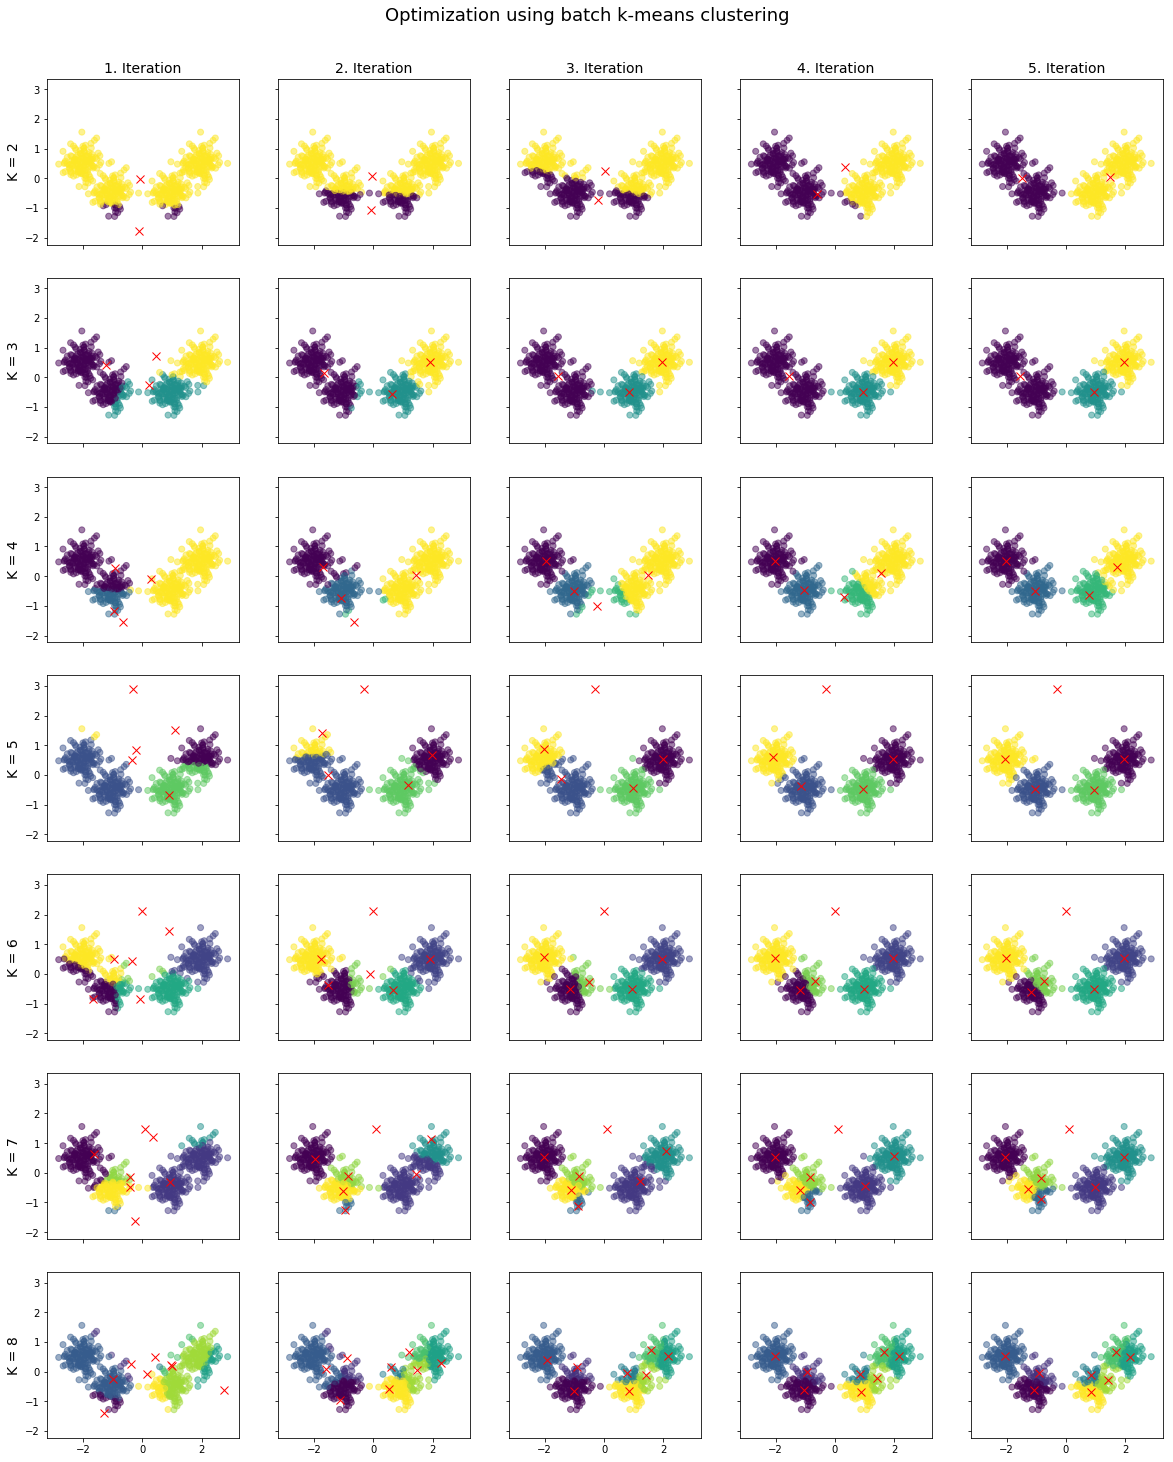

In [4]:
# Visualize
f, axes = plt.subplots(len(Ks), tmax, sharex=True, sharey=True, figsize=(20,25))
f.suptitle("Optimization using batch k-means clustering", size=18, y=0.92)
for i in range(len(Ks)):
    axes[i,0].set_ylabel("K = %i" %Ks[i], size=14)
    for j in range(tmax):
        axes[i,j].scatter(data[0], data[1], c=k_clusters[i][j], alpha=0.5)
        axes[i,j].plot(k_Ws[i][j][:,0], k_Ws[i][j][:,1], ".", marker="x", color="r", markersize=8)
        axes[i,j].axis('equal')
        axes[0,j].set_title("%i. Iteration" %(j+1), size=14)

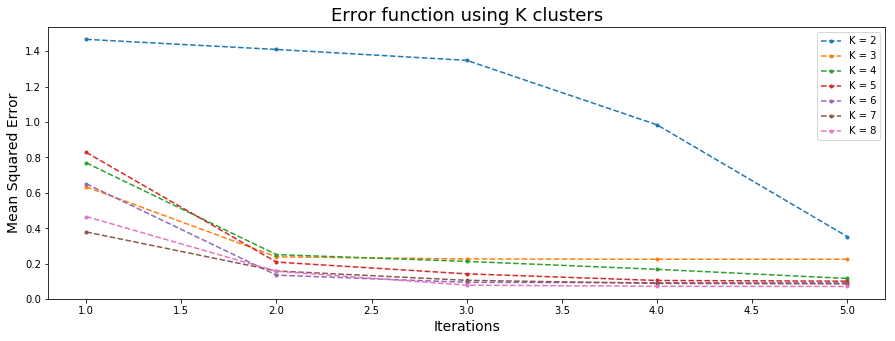

In [5]:
plt.figure(figsize=(15,5))
for i,E in enumerate(k_Es):
    plt.plot(range(1,tmax+1), E, ".--", label="K = %i" %Ks[i])
plt.title("Error function using K clusters", size=18)
plt.xlabel("Iterations", size=14)
plt.ylabel("Mean Squared Error", size=14)
plt.legend()
plt.show()

In [6]:
# New data points, meshgrid
x_min, x_max = data[0].min() - 1, data[0].max() + 1
y_min, y_max = data[1].min() - 1, data[1].max() + 1
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# predict the unseen data
# all points (px, py) on our grid in a nx2 matrix
query = np.c_[xx.ravel(), yy.ravel()].T
k_Ws_q, k_clusters_q, k_Es_q = k_means_batch(query, Ks, tmax)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


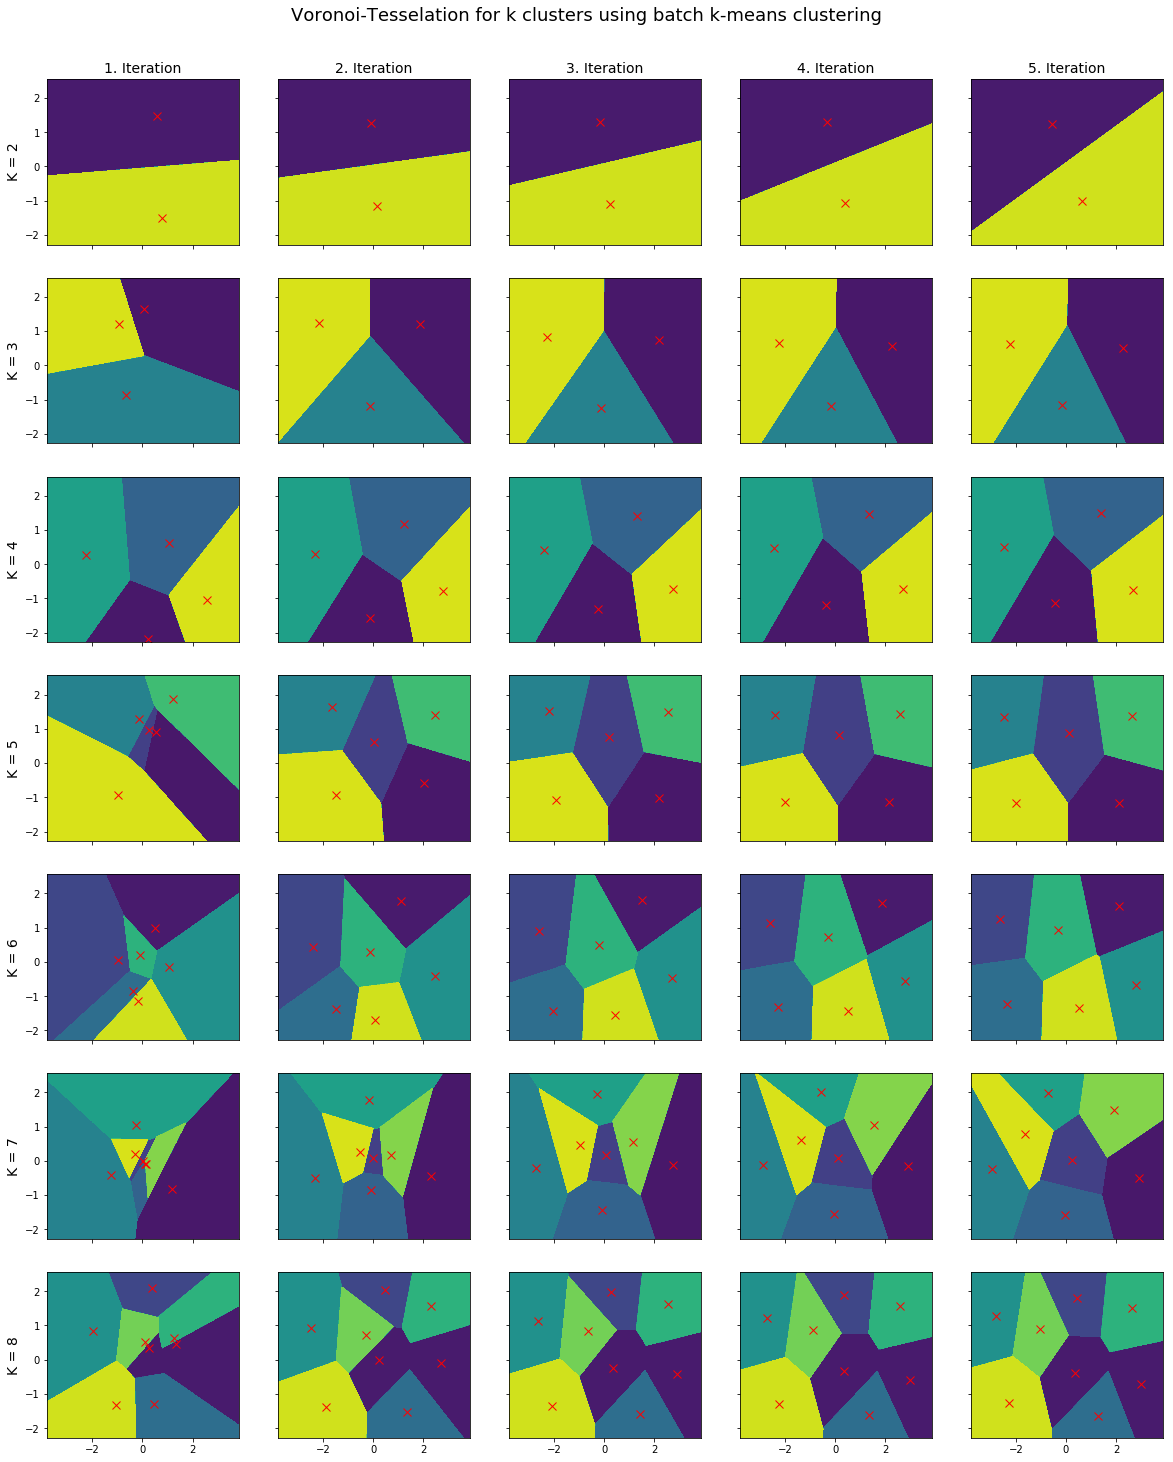

In [7]:
# Visualize
f, axes = plt.subplots(len(Ks), tmax, sharex=True, sharey=True, figsize=(20,25))
f.suptitle("Voronoi-Tesselation for k clusters using batch k-means clustering", size=18, y=0.92)
for i in range(len(Ks)):
    axes[i,0].set_ylabel("K = %i" %Ks[i], size=14)
    for j in range(tmax):
        axes[i,j].contourf(xx, yy, k_clusters_q[i][j].reshape(xx.shape[0], xx.shape[1]))#, vmin=vmin, vmax=vmax)
        axes[i,j].plot(k_Ws_q[i][j][:,0], k_Ws_q[i][j][:,1], ".", marker="x", color="r", markersize=8)
        #axes[i,j].axis('equal')
        axes[0,j].set_title("%i. Iteration" %(j+1), size=14)

## 9.2. Online K-means Clustering

In [8]:
def k_means_online(data, eta0, tau, k):
    tmax = data.shape[1]

    Ws = np.zeros((tmax+1, k, 2))
    Ws[0] = np.random.normal(means, size=(k,2))
    
    etas = np.zeros(tmax+1)
    etas[0] = eta0
    
    clusters = np.zeros((tmax))
    Es = np.zeros(tmax)

    for t in range(tmax):
        if t <= tmax/4: 
            etas[t] = eta0 
        else: 
            etas[t] = etas[t-1] * tau
            
        dist = euclidean_distances(data[:,t].reshape(1,2), Ws[t])
        q = dist.argmin(axis=1)
        clusters[t] = q
        #print((data[:,t] - Ws[t]).shape)
        delta_w = etas[t]*(data[:,t] - Ws[t,q])
        Ws[t+1] = Ws[t].copy()
        Ws[t+1,q] = Ws[t,q] + delta_w
        # Erros
        #print(dist[0,q])
        Es[t] = dist[0,q]**2 / 2

    return Ws, clusters, Es, etas

In [9]:
eta0 = 0.2
k = 4
tau = 0.985
Ws_o, clusters_o, Es_o, etas = k_means_online(data, eta0, tau, k)

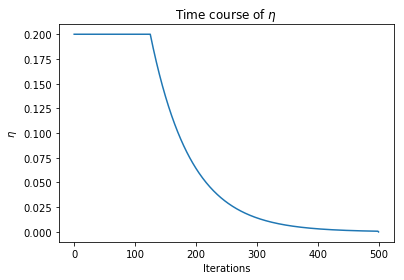

In [10]:
plt.figure()
plt.plot(etas)
plt.xlabel('Iterations')
plt.ylabel(r'$\eta$')
plt.title(r'Time course of $\eta$')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


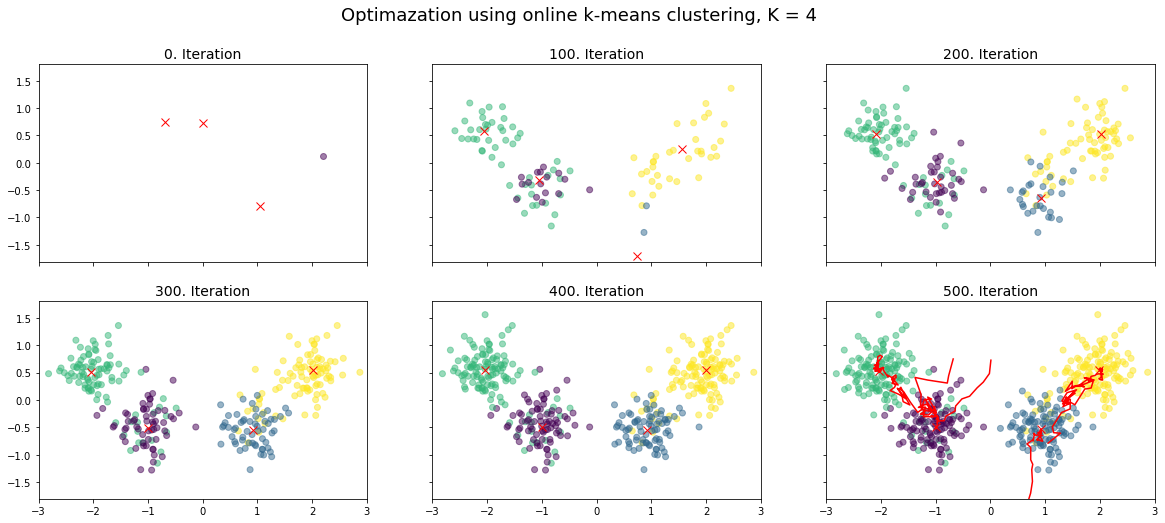

In [11]:
# Visualize
f, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20,8))
axes = axes.ravel()
f.suptitle("Optimazation using online k-means clustering, K = %i" %k, size=18, y=0.98)
for j, idx in enumerate(np.linspace(0, data.shape[1], 6)):
    c = -1 * np.ones(data.shape[1])
    c[:idx+1] = clusters_o[:idx+1]
    axes[j].scatter(data[0,:idx+1], data[1,:idx+1], c=c[:idx+1], alpha=0.5)
    axes[j].plot(Ws_o[idx][:,0], Ws_o[idx][:,1], ".", marker="x", color="r", markersize=8)
    axes[j].axis('equal')
    axes[j].set_xlim(-3, 3)
    axes[j].set_ylim(-2, 2)
    axes[j].set_title("%i. Iteration" %(idx), size=14)
for w in range(4):
    axes[-1].plot(Ws_o[:,w,0], Ws_o[:,w,1], "r")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


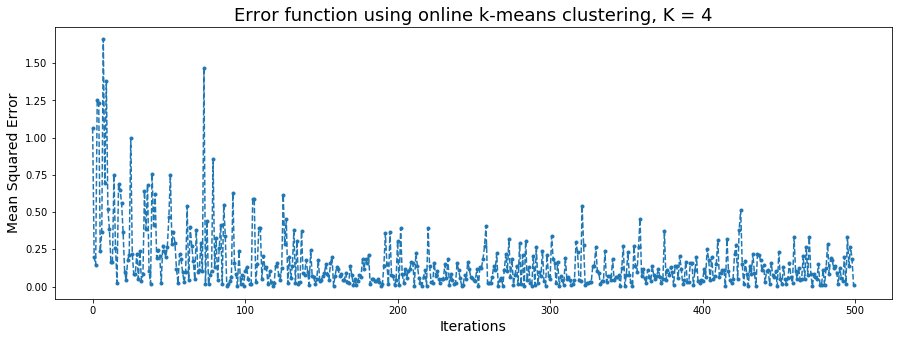

In [12]:
plt.figure(figsize=(15,5))
plt.plot(Es_o, ".--")
plt.title("Error function using online k-means clustering, K = 4", size=18)
plt.xlabel("Iterations", size=14)
plt.ylabel("Mean Squared Error", size=14)
plt.legend()
plt.show()

### 3. Soft K-means clustering

In [13]:
data = np.loadtxt("cluster.dat").T

### A. 

In [14]:
# Initializing the Parameters
K = 8
gamma = 0.000001
beta = np.arange(0.2, 20.1, 0.2)

# Calculating the mean of the data
mean3 = data.mean(axis=0)

# Setting the randomized weights for K clusters
w= np.zeros((K,2))
w[:,0] = np.random.normal(loc=mean3[0], size = K)
w[:,1] = np.random.normal(loc=mean3[1], size = K)

### B.

In [15]:
# Calculating Ms and updating weights
Ms = np.zeros((len(beta), data.shape[0], K))
w_n = np.zeros((len(beta), K, data.shape[1]))
for i, b in enumerate(beta):
    w_o = w.copy()
    Ms[i] = np.exp(-b/2*((euclidean_distances(data, w_o))**2))/np.sum(np.exp(-b/2*(euclidean_distances(data, w_o))**2), axis=1).reshape(500,1)
    w_n[i] = np.dot(Ms[i].T, data)/np.sum(Ms[i], axis=0).reshape(8,1)
    while np.all(euclidean_distances(w_n[i], w_o)) >= gamma:
        w_o = w_n[i]
        Ms[i] = np.exp(-1/2*((euclidean_distances(data, w_o))**2))/np.sum(np.exp(-1/2*(euclidean_distances(data, w_o))**2), axis=1).reshape(500,1)
        w_n[i] = np.dot(Ms[i].T, data)/np.sum(Ms[i], axis=0).reshape(8,1)

### C.

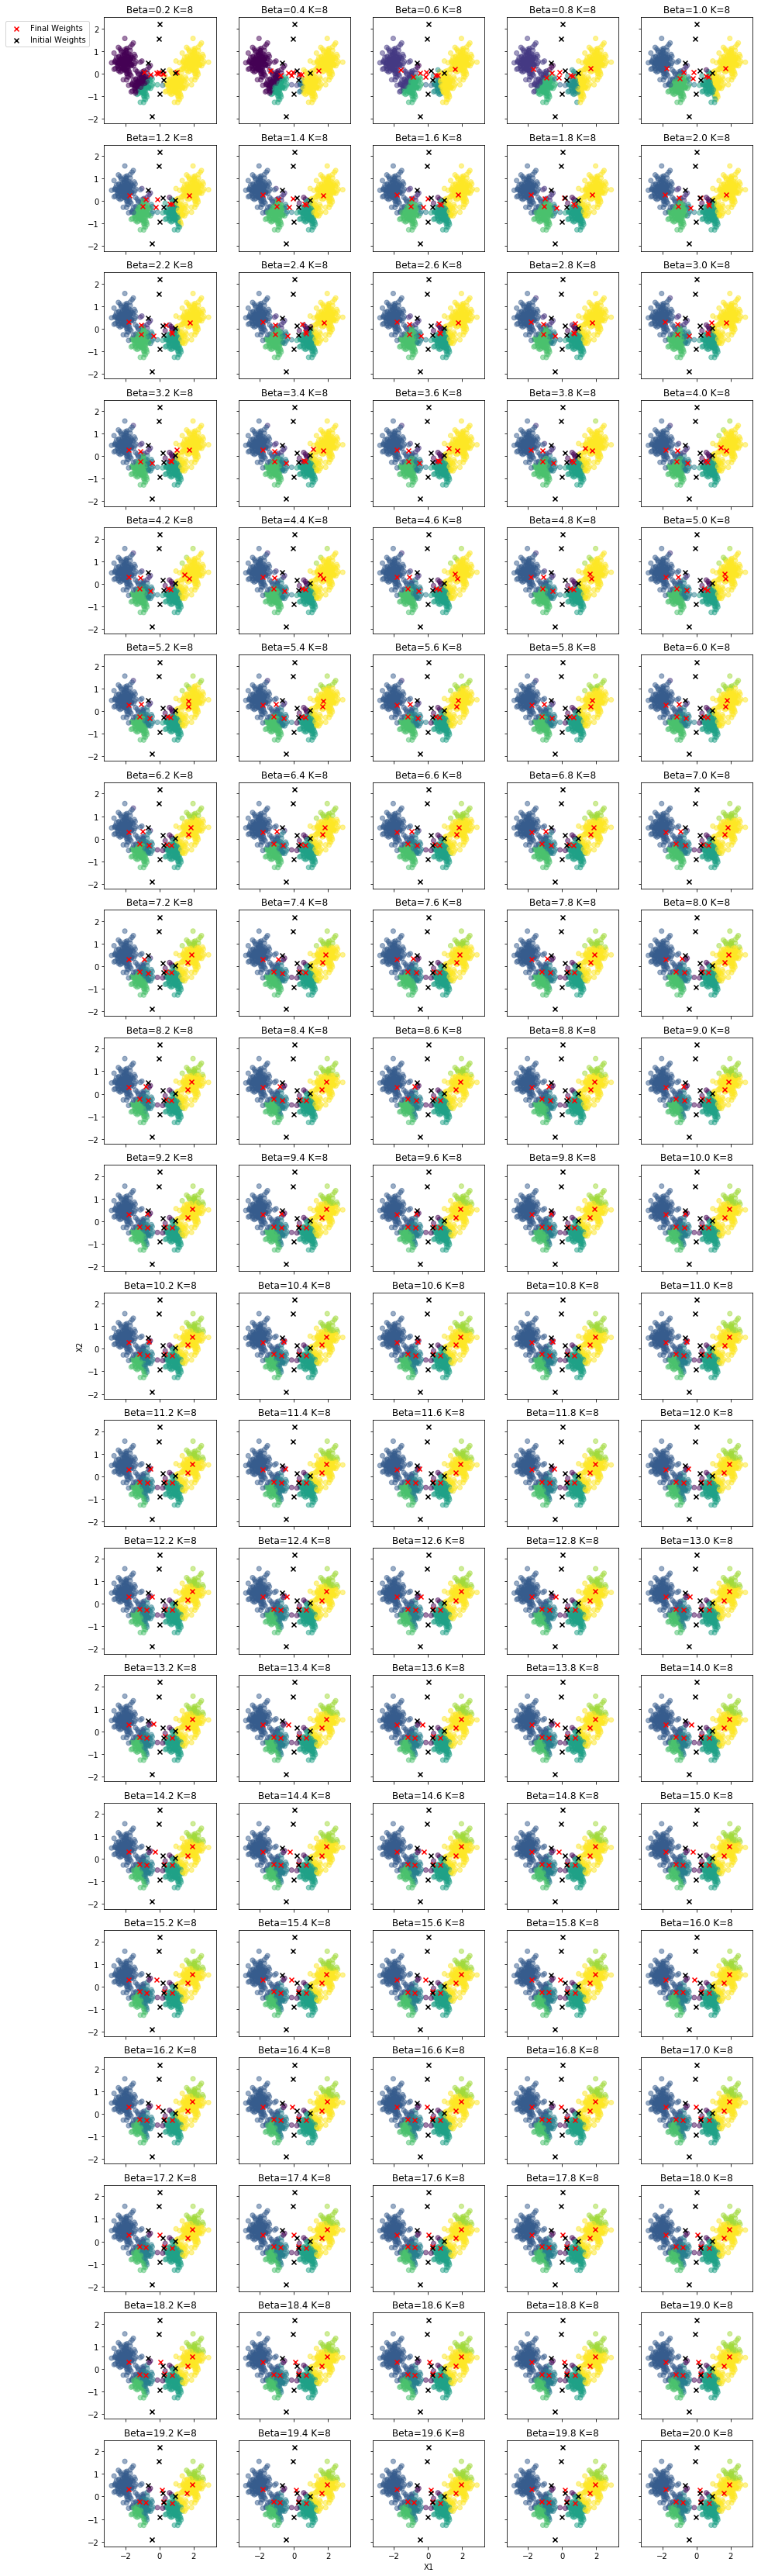

In [16]:
fig, axis = plt.subplots(20,5, sharex=True, sharey=True,figsize=(15,60))
axis=axis.ravel()
for i, b in enumerate(beta):
    axis[i].scatter(data[:,0],data[:,1], c=np.argmax(Ms[i,:,:], axis=1), alpha= 0.5)
    axis[i].scatter(w_n[i,:,0],w_n[i,:,1], marker = 'x',c='r', label="Final Weights")
    axis[i].scatter(w[:,0], w[:,1], marker = "x", c='k', label="Initial Weights")
    axis[i].set_title("Beta=%.1f K=%d" %(b,K))
axis[97].set_xlabel("X1")
axis[50].set_ylabel("X2")
axis[0].legend(bbox_to_anchor=(-0.1,1))
plt.show()

#### D.

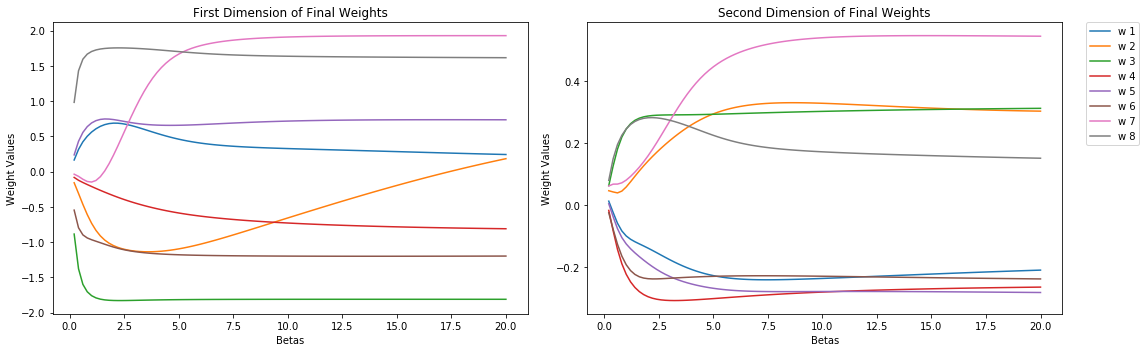

In [17]:
fig, axis = plt.subplots(1,2, sharex=True, figsize=(15,5))
for i in range(K):
    axis[0].plot(beta,w_n[:,i,0], label ='w %d' %(i+1))
    axis[0].set_title("First Dimension of Final Weights")
    axis[0].set_xlabel("Betas")
    axis[0].set_ylabel("Weight Values")
    axis[1].plot(beta,w_n[:,i,1], label ='w %d' %(i+1))
    axis[1].set_title("Second Dimension of Final Weights")
    axis[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axis[1].set_xlabel("Betas")
    axis[1].set_ylabel("Weight Values")
plt.tight_layout()
plt.show()

Firstly, we can see that as beta values increase both the first and second dimensions of the weights converge to a given value. These values are based on the original distributions of the data. As K=8 and the data has only 4 clusters, some clustering of weights can be also be seen. 

#### E.

In [18]:
tau = 1.1
beta = np.arange(0.2,20.1,2)
Ks = [2,4,6,8]
MsK = []
wnK =[]
ws =[]
for i, K in enumerate(Ks):
    # Setting the randomized weights for K clusters
    w2= np.zeros((K, 2))
    w2[:,0] = np.random.normal(loc=mean3[0], size = K)
    w2[:,1] = np.random.normal(loc=mean3[1], size = K)
    ws.append(w2)
    Ms = np.zeros((len(beta), data.shape[0], K))
    w_n2 = np.zeros((len(beta), K, data.shape[1]))
    for j, b in enumerate(beta):
        w_o = w2.copy()
        Ms[j] = np.exp(-b/2*((euclidean_distances(data, w_o))**2))/np.sum(np.exp(-b/2*(euclidean_distances(data, w_o))**2), axis=1).reshape(500,1)
        w_n2[j] = np.dot(Ms[j].T, data)/np.sum(Ms[j], axis=0).reshape(K,1)
        while np.all(euclidean_distances(w_n2[j], w_o)) >= gamma:
            w_o = w_n2[j]
            Ms[j] = np.exp(-1/2*((euclidean_distances(data, w_o))**2))/np.sum(np.exp(-1/2*(euclidean_distances(data, w_o))**2), axis=1).reshape(500,1)
            w_n2[j] = np.dot(Ms[j].T, data)/np.sum(Ms[j], axis=0).reshape(K,1)
            b *= tau
    MsK.append(Ms)
    wnK.append(w_n2)

#### F.

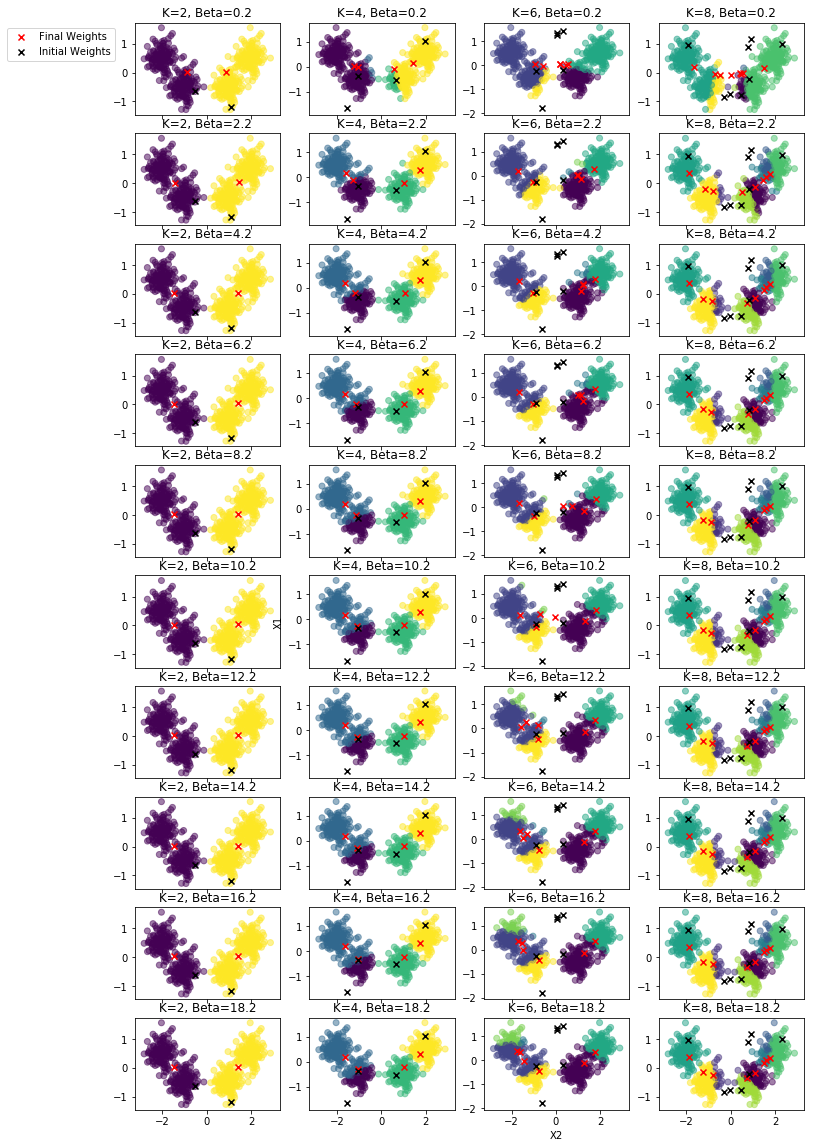

In [19]:
fig, axis = plt.subplots(10, 4, sharex=True,figsize=(12,20))
for j, K in enumerate(Ks):
    for i, b in enumerate(beta):
        axis[i, j].scatter(data[:,0],data[:,1], c=np.argmax(MsK[j][i,:,:], axis=1), alpha=0.5)
        axis[i, j].scatter(wnK[j][i,:,0],wnK[j][i,:,1], marker = 'x',c='r', label="Final Weights")
        axis[i,j].scatter(ws[j][:,0],ws[j][:,1], marker = 'x',c='k', label="Initial Weights")
        axis[i,j].set_title("K=%d, Beta=%.1f" %(K, b))
axis[5,1].set_ylabel("X1")
axis[9,2].set_xlabel("X2")
axis[0,0].legend(bbox_to_anchor=(-0.1, 1))
plt.show()